In [17]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiPoleModel
import smtf_utility as util

In [18]:
sim = util.bf_simulator([1, 1.33, 1.66, 1.99], 30, scale=1e9)
sim.add_dipole(0.5, 0,0,1,0,0)
sim.add_dipole(0,0.25,0,0,2,0)
sim.add_dipole(0,0,.15,0,0,3)

positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [19]:
model = MultiPoleModel(moments=3, lrate=0.0000015, optimizer='sgd', loss='huber', scale=1e9, early_stop=False, target_stop=1)
test_epochs = 2000

In [20]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 125.45539
epoch  1 --- Loss --- 125.22134
epoch  2 --- Loss --- 124.98728
epoch  3 --- Loss --- 124.75322
epoch  4 --- Loss --- 124.51916
epoch  5 --- Loss --- 124.28508
epoch  6 --- Loss --- 124.05101
epoch  7 --- Loss --- 123.81692
epoch  8 --- Loss --- 123.582825
epoch  9 --- Loss --- 123.348724
epoch  10 --- Loss --- 123.11462
epoch  11 --- Loss --- 122.8805
epoch  12 --- Loss --- 122.64637
epoch  13 --- Loss --- 122.41223
epoch  14 --- Loss --- 122.178085
epoch  15 --- Loss --- 121.943924
epoch  16 --- Loss --- 121.709755
epoch  17 --- Loss --- 121.47557
epoch  18 --- Loss --- 121.24138
epoch  19 --- Loss --- 121.007164
epoch  20 --- Loss --- 120.77295
epoch  21 --- Loss --- 120.53871
epoch  22 --- Loss --- 120.30446
epoch  23 --- Loss --- 120.0702
epoch  24 --- Loss --- 119.83592
epoch  25 --- Loss --- 119.60162
epoch  26 --- Loss --- 119.36732
epoch  27 --- Loss --- 119.13299
epoch  28 --- Loss --- 118.89864
epoch  29 --- Loss --- 118.66428
epoch  30 --- Lo

In [21]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 74.94575127363206 minutes


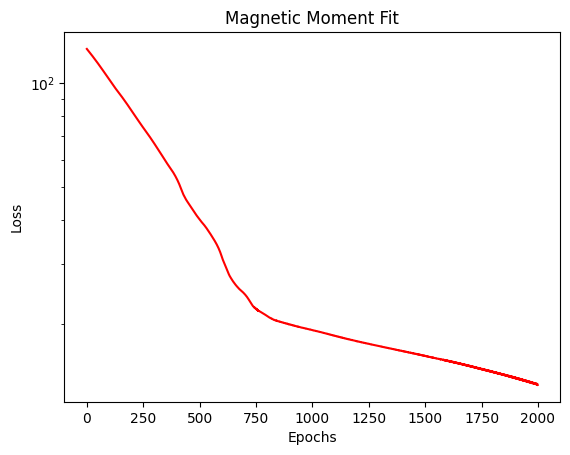

In [22]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [23]:
model.moment()

---- Moment  0 -----
Position:  [[-0.13885766 -0.13652681  0.09530673]]
Value:     [[0.17448965 0.45170337 1.2377293 ]]
---- Moment  1 -----
Position:  [[ 0.47172448 -0.10846572 -0.07133538]]
Value:     [[0.6623406 0.5398741 0.5399829]]
---- Moment  2 -----
Position:  [[-0.07640888  0.3287654  -0.00940554]]
Value:     [[0.25943258 1.0193071  0.73785466]]
